* feature dengan scaling.
* target dengan scaling

## Library

In [1]:
# import necessary module

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import concatenate
from keras.layers import Dense, Input, Dropout

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## Model Biasa

In [2]:
def model(n_input, n_target):
    """
    Fungsi untuk membuat model
    
    arguments:
        n_input = jumlah feature dari data input
        n_outut = jumlah target
        
    return:
        model
    """
    # initializer 
    initializer = tf.keras.initializers.GlorotUniform(seed=None)
    mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    aktivasi = "relu"

    # input layer
    visible = Input(shape=(n_input))
    
    # branch 1
    x1 = Dense(100, kernel_initializer = initializer, activation = aktivasi)(visible)
    x1 = Dense(75, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(50, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(n_target, kernel_initializer = initializer, activation = "tanh")(x1)    

    # model
    model = Model(inputs = visible, 
                  outputs = x1)
    
    #compile model
    model.compile(loss = mse,
                  optimizer = 'nadam')
    
    return model

## Data

In [3]:
# input data

feature = pd.read_csv("coef_fourier_kolom.csv")
feature.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
1653,-2.563005,-2.973074,-2.443338,-2.557678,-2.534632,-2.624665,-2.520351,-2.105729,-1.047345,-1.080173,...,-2.685741,-2.957202,-2.2546,-2.335488,-2.740364,-2.538247,-2.081158,-2.063519,-1.176523,-0.465348
4016,-2.561005,-2.971074,-2.432338,-2.546678,-2.468632,-2.558665,-2.126351,-1.711729,1.315655,1.282827,...,-2.683741,-2.955202,-2.2436,-2.324488,-2.674364,-2.472247,-1.687158,-1.669519,1.186477,1.897652
5078,-2.560005,-2.970074,-2.427338,-2.541678,-2.438632,-2.528665,-1.949351,-1.534729,2.377655,2.344827,...,-2.682741,-2.954202,-2.2386,-2.319488,-2.644364,-2.442247,-1.510158,-1.492519,2.248477,2.959652
2366,-2.562005,-2.972074,-2.440338,-2.554678,-2.514632,-2.604665,-2.401351,-1.986729,-0.334345,-0.367173,...,-2.684741,-2.956202,-2.2516,-2.332488,-2.720364,-2.518247,-1.962158,-1.944519,-0.463523,0.247652
2394,-2.562005,-2.972074,-2.439338,-2.553678,-2.513632,-2.603665,-2.396351,-1.981729,-0.306345,-0.339173,...,-2.684741,-2.956202,-2.2506,-2.331488,-2.719364,-2.517247,-1.957158,-1.939519,-0.435523,0.275652


In [4]:
# target data

target = pd.read_csv("coef_ekspansi.csv")
target.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
1744,0.016379,0.031032,0.042573,0.049557,0.052547,0.051168,0.046306,0.038540,0.029093,0.018534,...,0.028153,0.053373,0.073236,0.085240,0.090359,0.087995,0.079656,0.066339,0.050103,0.031855
2748,-0.018694,-0.035229,-0.047274,-0.053747,-0.054889,-0.050929,-0.043013,-0.032446,-0.020924,-0.009852,...,-0.031951,-0.060223,-0.080806,-0.091857,-0.093799,-0.087043,-0.073523,-0.055456,-0.035720,-0.016717
4552,0.029010,0.047689,0.057598,0.060158,0.054000,0.041653,0.024765,0.006595,-0.009738,-0.018688,...,0.049477,0.081209,0.097934,0.102246,0.091837,0.070889,0.042126,0.011026,-0.016998,-0.032221
802,0.015635,0.028864,0.039736,0.046774,0.050620,0.050647,0.047560,0.041546,0.033537,0.023642,...,0.027029,0.049932,0.068758,0.080925,0.087549,0.087602,0.082292,0.071943,0.058126,0.040925
2250,0.017277,0.032836,0.044683,0.051497,0.053721,0.051226,0.045018,0.035996,0.025591,0.014720,...,0.029607,0.056296,0.076616,0.088289,0.092083,0.087814,0.077190,0.061743,0.043893,0.025171


## Data Splitting

In [5]:
instances_1, feature_dim = feature.shape
instances_2, target_dim = target.shape

In [6]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 7)

## Scaling

In [7]:
# TRAINING SCALING
scaler = StandardScaler()

# fit on the training dataset
scaler.fit(X_train)

# scale the training set
X_train = scaler.transform(X_train)

# scale the test dataset
X_test = scaler.transform(X_test)

In [8]:
#TESTING SCALER
scaler = MinMaxScaler(feature_range = (-1, 1))

# fit on the test dataset
scaler.fit(y_train)

# scale the test set
y_train_dummy = scaler.transform(y_train)

# scale the test dataset
y_test_dummy = scaler.transform(y_test)

## Training

In [9]:
# model 

model = model(feature_dim, target_dim)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
Total params: 26,575
Trainable params: 26,575
Non-trainable params: 0
_________________________________________________________________


In [11]:
# training 
history = model.fit(x = X_train, 
           y = y_train_dummy, 
           batch_size = 8, 
           shuffle = True, 
           validation_data = (X_test, y_test_dummy), 
           epochs = 250)

Epoch 1/250
540/540 [==============================] - 2s 2ms/step - loss: 0.5491 - val_loss: 0.5310
Epoch 2/250
540/540 [==============================] - 1s 1ms/step - loss: 0.5230 - val_loss: 0.5160
Epoch 3/250
540/540 [==============================] - 1s 1ms/step - loss: 0.4794 - val_loss: 0.4582
Epoch 4/250
540/540 [==============================] - 1s 1ms/step - loss: 0.4184 - val_loss: 0.3789
Epoch 5/250
540/540 [==============================] - 1s 2ms/step - loss: 0.3793 - val_loss: 0.4866
Epoch 6/250
540/540 [==============================] - 1s 3ms/step - loss: 0.3519 - val_loss: 0.3524
Epoch 7/250
540/540 [==============================] - 1s 1ms/step - loss: 0.3446 - val_loss: 0.3071
Epoch 8/250
540/540 [==============================] - 1s 2ms/step - loss: 0.3162 - val_loss: 0.3030
Epoch 9/250
540/540 [==============================] - 1s 2ms/step - loss: 0.3087 - val_loss: 0.3125
Epoch 10/250
540/540 [==============================] - 1s 2ms/step - loss: 0.2980 - val_lo

540/540 [==============================] - 1s 3ms/step - loss: 0.1157 - val_loss: 0.1712
Epoch 82/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1281 - val_loss: 0.1011
Epoch 83/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1177 - val_loss: 0.1754
Epoch 84/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1238 - val_loss: 0.1018
Epoch 85/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1226 - val_loss: 0.0892
Epoch 86/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1141 - val_loss: 0.0957
Epoch 87/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1213 - val_loss: 0.1272
Epoch 88/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1157 - val_loss: 0.1304
Epoch 89/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1254 - val_loss: 0.1115
Epoch 90/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1207 - val_loss: 

Epoch 161/250
540/540 [==============================] - 1s 3ms/step - loss: 0.1091 - val_loss: 0.1079
Epoch 162/250
540/540 [==============================] - 1s 3ms/step - loss: 0.1084 - val_loss: 0.0894
Epoch 163/250
540/540 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1394
Epoch 164/250
540/540 [==============================] - 1s 3ms/step - loss: 0.1043 - val_loss: 0.1296
Epoch 165/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1080 - val_loss: 0.0985
Epoch 166/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1118 - val_loss: 0.1258
Epoch 167/250
540/540 [==============================] - 1s 3ms/step - loss: 0.1008 - val_loss: 0.1002
Epoch 168/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1030 - val_loss: 0.1092
Epoch 169/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0991 - val_loss: 0.0940
Epoch 170/250
540/540 [==============================] - 1s 3ms/step - lo

540/540 [==============================] - 1s 2ms/step - loss: 0.0974 - val_loss: 0.0951
Epoch 241/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0981 - val_loss: 0.1049
Epoch 242/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0960 - val_loss: 0.1102
Epoch 243/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1033 - val_loss: 0.1029
Epoch 244/250
540/540 [==============================] - 1s 3ms/step - loss: 0.0981 - val_loss: 0.0958
Epoch 245/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0834 - val_loss: 0.1287
Epoch 246/250
540/540 [==============================] - 1s 2ms/step - loss: 0.1050 - val_loss: 0.0928
Epoch 247/250
540/540 [==============================] - 1s 3ms/step - loss: 0.0988 - val_loss: 0.1503
Epoch 248/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0901 - val_loss: 0.0847
Epoch 249/250
540/540 [==============================] - 1s 3ms/step - loss: 0.0973 - v

## Visualisasi

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

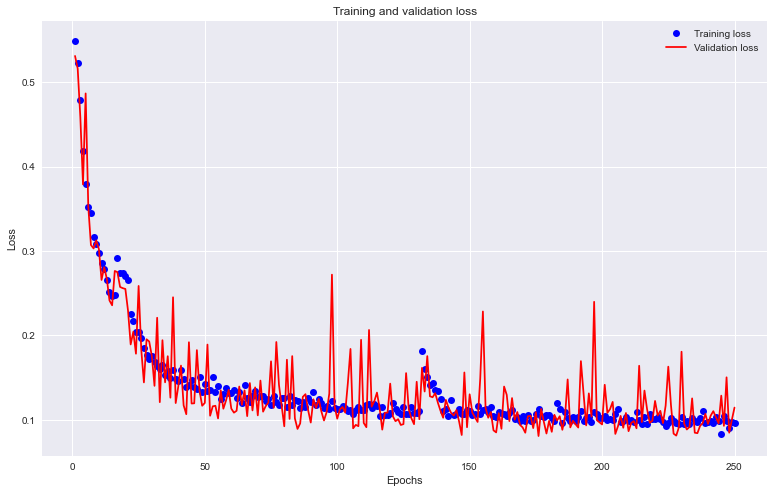

In [13]:
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (13, 8))
plt.style.use("seaborn")

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Prediction

In [15]:
# prediksi
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

34/34 [==============================] - 0s 2ms/step


In [16]:
prediksi = prediction.flatten()
real = y_test.to_numpy().flatten()

In [17]:
df = {"predict": prediksi, "real": real}
pd.DataFrame(df)

,predict,real
0,-0.031544,-0.032400
1,-0.050082,-0.050352
2,-0.058264,-0.058402
3,-0.060043,-0.059045
4,-0.054550,-0.050413
...,...,...
107995,-0.087760,-0.087051
107996,-0.073646,-0.073553
107997,-0.054923,-0.055506
107998,-0.034062,-0.035783


In [18]:
from sklearn.metrics import r2_score
r2_score(real, prediksi)

0.8018740482920826

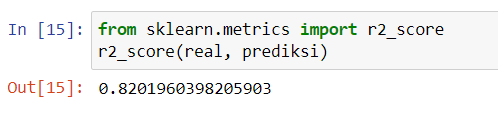

# ------------------------------------------------------------------------------------------------